### Setup

In [50]:
#Tokens für v1.1 ...
consumer_key_v1 = '97N3G5aEuk26CWyymmrJsp5Tn'
consumer_secret_v1 = '5lkdRGTtbIxrIeAIQOSZlOfcl1krXqky9i1zHCpkXLc2a2r0kt'
access_token_v1 = '1370306915062923269-O6Iu4FcoFcxxVsEK2SwYUYqGZn8ZYU'
access_token_secret_v1 = 'CibkjBgAbvODvw67SUFeK2KsfdzrUU0eBHt7MAABpIdmU'

In [51]:
#Tokens für v2
consumer_key_v2= '3BPNKnwhdb2bOmkJPM3Nsr2xM'
consumer_secret_v2= 'U3v5EPJ1CyXG0Ow8VghsDVoue1iwwPhEbWntIvFDxUYcO1Eo4K'
access_token_v2 = '1524784534667112448-w4anzTJy16Fhz1k2PQD5Yw0lxy4E6y'
access_token_secret_v2 = 'EbKcoxxLNhY8ZRilIDbuJ8BkN3n2ZNWVFY8n7brYBLWst'
bearer_token_v2 = 'AAAAAAAAAAAAAAAAAAAAAMMVcgEAAAAAxbjzChVlAondghdM0sdOIeprL%2BU%3DK8r0YIP97sF9ViShCW0hqTjlkA4xowzva2FRI5de430tKPsESy'

In [52]:
import tweepy

#v1.1
auth_v1 = tweepy.OAuthHandler(consumer_key_v1, consumer_secret_v1)
auth_v1.set_access_token(access_token_v1,access_token_secret_v1)
api_v1 = tweepy.API(auth_v1)

#v2
client_v2 = tweepy.Client(
    consumer_key=consumer_key_v2, 
    consumer_secret=consumer_secret_v2, 
    access_token=access_token_v2, 
    access_token_secret=access_token_secret_v2, 
    bearer_token=bearer_token_v2
)

In [53]:
#https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/api-reference/get-tweets
all_expansions_v2 = [
    "attachments.poll_ids", 
    "attachments.media_keys", 
    "author_id", 
    "entities.mentions.username", 
    "geo.place_id", 
    "in_reply_to_user_id",
    "referenced_tweets.id", 
    "referenced_tweets.id.author_id"
]

all_media_fields_v2 = [
    "duration_ms", 
    "height", 
    "media_key",
    "preview_image_url", 
    "type", 
    "url", 
    "width", 
    "public_metrics", 
    #"non_public_metrics", 
    #"organic_metrics", 
    #"promoted_metrics", 
    "alt_text"
]

all_place_fields_v2 = [
    "contained_within", 
    "country", 
    "country_code", 
    "full_name", 
    "geo", 
    "id", 
    "name", 
    "place_type"
]

all_poll_fields_v2 = [
    "duration_minutes", 
    "end_datetime", 
    "id", 
    "options", 
    "voting_status"
]

all_tweet_fields_v2 = [
    "attachments", 
    "author_id", 
    "context_annotations", 
    "conversation_id", 
    "created_at", 
    "entities", 
    "geo", 
    "id", 
    "in_reply_to_user_id", 
    "lang", 
    #"non_public_metrics", 
    "public_metrics", 
    #"organic_metrics", 
    #"promoted_metrics", 
    "possibly_sensitive", 
    "referenced_tweets", 
    "reply_settings", 
    "source", 
    "text", 
    "withheld"
]

all_user_fields_v2 = [
    "created_at", 
    "description", 
    "entities", 
    "id", 
    "location", 
    "name", 
    "pinned_tweet_id", 
    "profile_image_url", 
    "protected", 
    "public_metrics", 
    "url", 
    "username", 
    "verified", 
    "withheld"
]


In [54]:
from pprint import pprint

In [55]:
import types
def get_hr_fields(obj):
    return [d for d in dir(obj) if not (d.startswith("_") or type(getattr(obj, d)) in [types.BuiltinFunctionType, types.MethodType])]

In [56]:
def print_fields(obj, hr=True):
    if hr:
        pprint(get_hr_fields(obj))
    else:
        pprint([d for d in dir(obj)])

In [57]:
def print_as_dict(obj):
    keys = get_hr_fields(obj)
    output = {}
    for key in keys:
        output[key] = getattr(obj, key)
    pprint(output)

In [58]:
def overview_tweets(tweets):
    print("\nerrors: ")
    pprint(tweets.errors)

    print("\nmeta: ")
    pprint(tweets.meta)

    print("\nincludes: ")
    pprint(tweets.includes)

    print("\ndata: ")
    pprint(tweets.data)

In [59]:
def get_user(id, users):
    for user in users:
        if user.id == id:
            return user

In [60]:
def get_hashtag_trends(top_trends):
    hashtag_trends = [trend for trend in top_trends[0]["trends"] if trend["name"].startswith("#") and trend["tweet_volume"] is not None]
    return sorted(hashtag_trends, key=lambda trend: trend["tweet_volume"], reverse=True)

In [61]:
import matplotlib.pyplot as plt 
import numpy as np

def plot_recent_tc(recent_tweets_count_data, title):
    t_minus_min = [x for x in range(len(recent_tweets_count_data))]
    t_minus_min = np.array(t_minus_min) * -1
    t_minus_min = t_minus_min[::-1]

    tweet_counts = [count["tweet_count"] for count in recent_tweets_count_data]

    plt.figure(figsize=(12,6))
    plt.xlabel('t [min]') 
    plt.ylabel('tweet count') 
    plt.title(f"#tweets/min for {title}")
    plt.plot(t_minus_min, tweet_counts)

In [62]:
def get_sorted_countries(available_locations):
    #Daten von https://www.woeids.com/
    countries = []
    first = True
    with open("woeid.txt") as f:
        for line in f.readlines():
            if first:
                first = False
            else:
                line = line.split(",")
                countries.append({
                    "name": line[0],
                    "woeid": int(line[-1].strip())
                })

    #Daten von https://www.factmonster.com/worlds-50-most-populous-countries-20167
    sorted_countries = []
    with open("population.txt") as f:
        for line in f.readlines():
            for country in countries:
                if country["name"].lower().strip() == line.lower().strip():
                    sorted_countries.append(country)
                    break

    prefix = [
        {
            "name": "World",
            "woeid": "1"
        }
    ]

    sorted_countries = prefix + sorted_countries

    available_woeids = [place["woeid"] for place in available_locations]

    final_sorted_countries = []
    for country in sorted_countries:
        if country["woeid"] in available_woeids:
            final_sorted_countries.append(country)
            
    return final_sorted_countries

In [63]:
def get_improved_hashtag_trends(num_calls=40):
    available_locations = api_v1.available_trends()
    sorted_countries = get_sorted_countries(available_locations)

    improved_hashtag_trends = []

    for country in sorted_countries[:num_calls]:
        top_country_trends = api_v1.get_place_trends(country["woeid"])
        top_country_hashtag_trends = get_hashtag_trends(top_country_trends)
        improved_hashtag_trends += top_country_hashtag_trends

    found = []
    improved_hashtag_trends_unique = []
    for trend in improved_hashtag_trends:
        if trend["name"] not in found:
            improved_hashtag_trends_unique.append(trend)
            found.append(trend["name"])

    improved_hashtag_trends_unique = sorted(improved_hashtag_trends_unique, key=lambda trend: trend["tweet_volume"], reverse=True)

    return improved_hashtag_trends_unique

### v1.1 search tweets test

In [ ]:
# tweets_v11 = [tweet for tweet in tweepy.Cursor(api_v1.search_tweets, q='#ESC -is:retweet', count=10).items(1)]
# pprint(tweets_v11[0]._json)

### Search recent tweets
#### Ohne fields

In [64]:
query = '#ESC -is:retweet'

tweets = client_v2.search_recent_tweets(query=query, max_results=10)

In [65]:
print_fields(tweets)

['data', 'errors', 'includes', 'meta']


In [66]:
overview_tweets(tweets)


errors: 
[]

meta: 
{'newest_id': '1526485247281577987',
 'next_token': 'b26v89c19zqg8o3fpywnbkjxmfdlfay7j78w6xh19ubgd',
 'oldest_id': '1526480335172780032',
 'result_count': 10}

includes: 
{}

data: 
[<Tweet id=1526485247281577987 text='@vm_dittrich @ntv Ihr gehört in jedem Fall in die #ESC Jury.👍 Für andere Nationen ist der #ESC Wettbewerb &amp; Spaß wie Spektakel in einem. Für Deutschland eher eine 0815 Veranstaltung die viel Geld kostet,aber ohne jeglichen Ehrgeiz dabei zu gewinnen. Deshalb die mageren Ergebnisse am Schluss. 🥴😢'>,
 <Tweet id=1526484483280715776 text='@DWDL Diese endlose "Überarbeiterei" ist nur noch lächerlich und wird zu nichts führen. Holt einfach #StefanRaab, dann klappt´s auch mit dem #ESC!'>,
 <Tweet id=1526484416352092161 text='Eurovision 2023  \nhttps://t.co/JuZnieMBdN\n\n#Eurovision2023 #Eurovision #ESC #Ukraine #Ukrayna #KalushOrkestra #Stefania https://t.co/DKLCzLgCWs'>,
 <Tweet id=1526484107571732482 text='Ukraine hat Polen und Litauen beim #ESC keine 

In [67]:
max_calls = 10
current_next_token = None
more_tweets = []
for i in range(max_calls):
    current_page = client_v2.search_recent_tweets(query=query, max_results=10, next_token=current_next_token)
    if current_page.data is None:
        break
    more_tweets += current_page.data
    if "next_token" not in current_page.meta:
        break
    current_next_token = current_page.meta["next_token"]  
len(more_tweets)

100

In [68]:
pprint(more_tweets)

[<Tweet id=1526485247281577987 text='@vm_dittrich @ntv Ihr gehört in jedem Fall in die #ESC Jury.👍 Für andere Nationen ist der #ESC Wettbewerb &amp; Spaß wie Spektakel in einem. Für Deutschland eher eine 0815 Veranstaltung die viel Geld kostet,aber ohne jeglichen Ehrgeiz dabei zu gewinnen. Deshalb die mageren Ergebnisse am Schluss. 🥴😢'>,
 <Tweet id=1526484483280715776 text='@DWDL Diese endlose "Überarbeiterei" ist nur noch lächerlich und wird zu nichts führen. Holt einfach #StefanRaab, dann klappt´s auch mit dem #ESC!'>,
 <Tweet id=1526484416352092161 text='Eurovision 2023  \nhttps://t.co/JuZnieMBdN\n\n#Eurovision2023 #Eurovision #ESC #Ukraine #Ukrayna #KalushOrkestra #Stefania https://t.co/DKLCzLgCWs'>,
 <Tweet id=1526484107571732482 text='Ukraine hat Polen und Litauen beim #ESC keine Punkte gegeben? Wasn da passiert, die haben sich doch schon früher alle gegenseitig mit Punkten bedacht'>,
 <Tweet id=1526484022863482880 text='Für alle die es nicht mitbekommen haben: Der @ndr bleibt fü

In [69]:
example_tweet = tweets.data[0]

In [70]:
print_as_dict(example_tweet)

{'attachments': None,
 'author_id': None,
 'context_annotations': [],
 'conversation_id': None,
 'created_at': None,
 'data': {'id': '1526485247281577987',
          'text': '@vm_dittrich @ntv Ihr gehört in jedem Fall in die #ESC '
                  'Jury.👍 Für andere Nationen ist der #ESC Wettbewerb &amp; '
                  'Spaß wie Spektakel in einem. Für Deutschland eher eine 0815 '
                  'Veranstaltung die viel Geld kostet,aber ohne jeglichen '
                  'Ehrgeiz dabei zu gewinnen. Deshalb die mageren Ergebnisse '
                  'am Schluss. 🥴😢'},
 'entities': None,
 'geo': None,
 'id': 1526485247281577987,
 'in_reply_to_user_id': None,
 'lang': None,
 'non_public_metrics': None,
 'organic_metrics': None,
 'possibly_sensitive': None,
 'promoted_metrics': None,
 'public_metrics': None,
 'referenced_tweets': None,
 'reply_settings': None,
 'source': None,
 'text': '@vm_dittrich @ntv Ihr gehört in jedem Fall in die #ESC Jury.👍 Für '
         'andere Nationen i

#### mit fields

In [71]:
tweets_2 = client_v2.search_recent_tweets(query=query, tweet_fields=["author_id"], expansions=["author_id"], max_results=10)
overview_tweets(tweets_2)


errors: 
[]

meta: 
{'newest_id': '1526488350722514944',
 'next_token': 'b26v89c19zqg8o3fpywnbkjxmg0tgwgwosziw43p5f919',
 'oldest_id': '1526480691583762434',
 'result_count': 10}

includes: 
{'users': [<User id=1481278790286331911 name=Christina 🐞 ungeimpft username=_Poebel_>,
           <User id=337159814 name=Joerg Sven Leschke username=leschki>,
           <User id=1347912833078587393 name=Schwarzwaldmädle username=Brigitt44763587>,
           <User id=165376366 name=Adem KAVAZ #eurovision username=adem_kavaz>,
           <User id=19152738 name=bootboss username=bootboss>,
           <User id=1221893140115791873 name=Cappucinto username=Cappucinto1>,
           <User id=35880119 name=b fed username=RicoBello>,
           <User id=1335927283471757312 name=Kristijan Juric username=krisjuric>,
           <User id=1525461061926780928 name=Ece username=Ecesc20>,
           <User id=789441258804637697 name=Svitac Bosnia username=Svitac_BiH>]}

data: 
[<Tweet id=1526488350722514944 text='

In [72]:
example_tweet_2 = tweets_2.data[0]
print_as_dict(example_tweet_2)

{'attachments': None,
 'author_id': 1481278790286331911,
 'context_annotations': [],
 'conversation_id': None,
 'created_at': None,
 'data': {'author_id': '1481278790286331911',
          'id': '1526488350722514944',
          'text': 'Zu welcher Partei gehört der #ESC?'},
 'entities': None,
 'geo': None,
 'id': 1526488350722514944,
 'in_reply_to_user_id': None,
 'lang': None,
 'non_public_metrics': None,
 'organic_metrics': None,
 'possibly_sensitive': None,
 'promoted_metrics': None,
 'public_metrics': None,
 'referenced_tweets': None,
 'reply_settings': None,
 'source': None,
 'text': 'Zu welcher Partei gehört der #ESC?',
 'withheld': None}


In [73]:
example_author_id_2 = example_tweet_2.author_id
users = tweets_2.includes["users"]
user = get_user(example_author_id_2, users)
print_as_dict(user)

{'created_at': None,
 'data': {'id': '1481278790286331911',
          'name': 'Christina 🐞 ungeimpft',
          'username': '_Poebel_'},
 'description': None,
 'entities': None,
 'id': 1481278790286331911,
 'location': None,
 'name': 'Christina 🐞 ungeimpft',
 'pinned_tweet_id': None,
 'profile_image_url': None,
 'protected': None,
 'public_metrics': None,
 'url': None,
 'username': '_Poebel_',
 'verified': None,
 'withheld': None}


### v1.1 place trends

In [74]:
#WHERE ON EARTH ID für weltweit
WOEID = 1

top_trends = api_v1.get_place_trends(WOEID)

In [75]:
pprint(top_trends)

[{'as_of': '2022-05-17T09:05:24Z',
  'created_at': '2022-05-16T04:36:34Z',
  'locations': [{'name': 'Worldwide', 'woeid': 1}],
  'trends': [{'name': '#ファミマで初夏のホロ祭り',
              'promoted_content': None,
              'query': '%23%E3%83%95%E3%82%A1%E3%83%9F%E3%83%9E%E3%81%A7%E5%88%9D%E5%A4%8F%E3%81%AE%E3%83%9B%E3%83%AD%E7%A5%AD%E3%82%8A',
              'tweet_volume': 16552,
              'url': 'http://twitter.com/search?q=%23%E3%83%95%E3%82%A1%E3%83%9F%E3%83%9E%E3%81%A7%E5%88%9D%E5%A4%8F%E3%81%AE%E3%83%9B%E3%83%AD%E7%A5%AD%E3%82%8A'},
             {'name': 'ネットカジノ',
              'promoted_content': None,
              'query': '%E3%83%8D%E3%83%83%E3%83%88%E3%82%AB%E3%82%B8%E3%83%8E',
              'tweet_volume': 35916,
              'url': 'http://twitter.com/search?q=%E3%83%8D%E3%83%83%E3%83%88%E3%82%AB%E3%82%B8%E3%83%8E'},
             {'name': '#ゆっくりを返せ',
              'promoted_content': None,
              'query': '%23%E3%82%86%E3%81%A3%E3%81%8F%E3%82%8A%E3%82%92%E8%BF%94%

In [76]:
len(top_trends[0]["trends"])

50

In [77]:
hashtag_trends = get_hashtag_trends(top_trends)

In [78]:
len(hashtag_trends)

5

In [ ]:
pprint(hashtag_trends)

In [79]:
improved_hashtag_trends = get_improved_hashtag_trends(num_calls=20)

In [80]:
len(improved_hashtag_trends)

76

In [81]:
pprint(improved_hashtag_trends)

[{'name': '#DestinyClinicZeeNuNew',
  'promoted_content': None,
  'query': '%23DestinyClinicZeeNuNew',
  'tweet_volume': 324981,
  'url': 'http://twitter.com/search?q=%23DestinyClinicZeeNuNew'},
 {'name': '#ProofOfInspiration1',
  'promoted_content': None,
  'query': '%23ProofOfInspiration1',
  'tweet_volume': 291437,
  'url': 'http://twitter.com/search?q=%23ProofOfInspiration1'},
 {'name': '#กลุ่มเรื้อนรุมตบเด็กอายุ11',
  'promoted_content': None,
  'query': '%23%E0%B8%81%E0%B8%A5%E0%B8%B8%E0%B9%88%E0%B8%A1%E0%B9%80%E0%B8%A3%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%99%E0%B8%A3%E0%B8%B8%E0%B8%A1%E0%B8%95%E0%B8%9A%E0%B9%80%E0%B8%94%E0%B9%87%E0%B8%81%E0%B8%AD%E0%B8%B2%E0%B8%A2%E0%B8%B811',
  'tweet_volume': 270457,
  'url': 'http://twitter.com/search?q=%23%E0%B8%81%E0%B8%A5%E0%B8%B8%E0%B9%88%E0%B8%A1%E0%B9%80%E0%B8%A3%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%99%E0%B8%A3%E0%B8%B8%E0%B8%A1%E0%B8%95%E0%B8%9A%E0%B9%80%E0%B8%94%E0%B9%87%E0%B8%81%E0%B8%AD%E0%B8%B2%E0%B8%A2%E0%B8%B811'},
 {'name': '#ฮาร์ทดิสขอ

### Recent Tweets Count

In [82]:
hashtag = improved_hashtag_trends[0]["name"]
#query = f'{hashtag} -is:retweet'
query = f'{hashtag}'

recent_tweets_count = client_v2.get_recent_tweets_count(query=query, granularity="minute")

In [83]:
print_as_dict(recent_tweets_count)

{'data': [{'end': '2022-05-15T15:15:00.000Z',
           'start': '2022-05-15T15:14:00.000Z',
           'tweet_count': 0},
          {'end': '2022-05-15T15:16:00.000Z',
           'start': '2022-05-15T15:15:00.000Z',
           'tweet_count': 0},
          {'end': '2022-05-15T15:17:00.000Z',
           'start': '2022-05-15T15:16:00.000Z',
           'tweet_count': 0},
          {'end': '2022-05-15T15:18:00.000Z',
           'start': '2022-05-15T15:17:00.000Z',
           'tweet_count': 0},
          {'end': '2022-05-15T15:19:00.000Z',
           'start': '2022-05-15T15:18:00.000Z',
           'tweet_count': 0},
          {'end': '2022-05-15T15:20:00.000Z',
           'start': '2022-05-15T15:19:00.000Z',
           'tweet_count': 0},
          {'end': '2022-05-15T15:21:00.000Z',
           'start': '2022-05-15T15:20:00.000Z',
           'tweet_count': 0},
          {'end': '2022-05-15T15:22:00.000Z',
           'start': '2022-05-15T15:21:00.000Z',
           'tweet_count': 0},
        

In [84]:
len(recent_tweets_count.data)

2518

In [85]:
next_end_time = None
full_recent_tweets_count_data = []
try:
    while True:
        current_recent_tweet_count = client_v2.get_recent_tweets_count(query=query, granularity="minute", end_time=next_end_time)
        full_recent_tweets_count_data = current_recent_tweet_count.data + full_recent_tweets_count_data
        next_end_time = current_recent_tweet_count.data[0]["start"]
except tweepy.errors.BadRequest:
    print("time limit reached ...")

time limit reached ...


In [86]:
len(full_recent_tweets_count_data)

10081

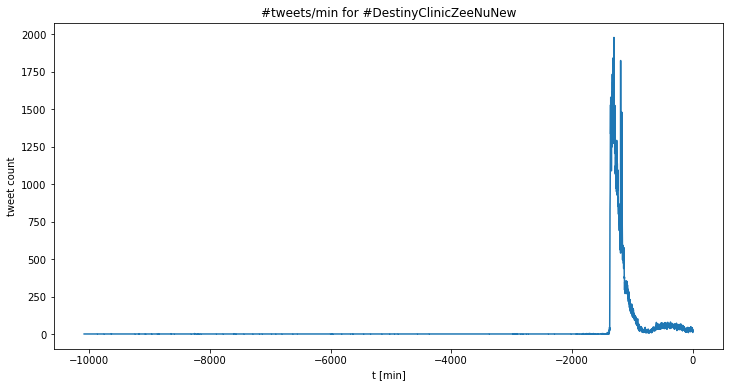

In [87]:
#plot_recent_tc(recent_tweets_count_data=recent_tweets_count.data[-(24*60):], title=hashtag)
plot_recent_tc(recent_tweets_count_data=full_recent_tweets_count_data, title=hashtag)

### Filtered Stream

In [88]:
class Tweet_Printer(tweepy.StreamingClient):
    def on_tweet(self, tweet):
        print_as_dict(tweet)

printer = Tweet_Printer(bearer_token_v2)

In [89]:
printer.add_rules(tweepy.StreamRule("#BDCCTEST"))

Response(data=[StreamRule(value='#BDCCTEST', tag=None, id='1526490790159163393')], includes={}, errors=[], meta={'sent': '2022-05-17T09:12:21.212Z', 'summary': {'created': 1, 'not_created': 0, 'valid': 1, 'invalid': 0}})

In [90]:
printer.get_rules()

Response(data=[StreamRule(value='#BDCCTEST', tag=None, id='1526490790159163393')], includes={}, errors=[], meta={'sent': '2022-05-17T09:12:23.747Z', 'result_count': 1})

In [ ]:
# rule_id = 1526284287573729282
# printer.delete_rules([rule_id])

In [91]:
printer.filter(tweet_fields=all_tweet_fields_v2)

{'attachments': {},
 'author_id': 1524784534667112448,
 'context_annotations': [],
 'conversation_id': 1526491010032885761,
 'created_at': datetime.datetime(2022, 5, 17, 9, 13, 12, tzinfo=datetime.timezone.utc),
 'data': {'attachments': {},
          'author_id': '1524784534667112448',
          'conversation_id': '1526491010032885761',
          'created_at': '2022-05-17T09:13:12.000Z',
          'entities': {'hashtags': [{'end': 9, 'start': 0, 'tag': 'BDCCTEST'}]},
          'geo': {},
          'id': '1526491010032885761',
          'lang': 'de',
          'possibly_sensitive': False,
          'public_metrics': {'like_count': 0,
                             'quote_count': 0,
                             'reply_count': 0,
                             'retweet_count': 0},
          'reply_settings': 'everyone',
          'source': 'Twitter Web App',
          'text': '#BDCCTEST upload test, ob er das wohl jemals liest?'},
 'entities': {'hashtags': [{'end': 9, 'start': 0, 'tag': 'BDCC

KeyboardInterrupt: 

### Volume Stream

In [92]:
import time

class Volume_Counter(tweepy.StreamingClient):
    def __init__(self, bearer_token):
        super().__init__(bearer_token)
        self.counter = 0
        self.start = time.perf_counter()

    def on_tweet(self, tweet):
        self.counter += 1
        if self.counter % 100 == 0:
            end = time.perf_counter()
            throughput = 100/(end - self.start)        
            print(f"Tweets received: {self.counter}, throughput: {throughput} tweets/s")
            self.start = end

counter = Volume_Counter(bearer_token_v2)

In [93]:
counter.sample(threaded=False)

Tweets received: 100, throughput: 10.909959103800741 tweets/s
Tweets received: 200, throughput: 50.290257766307654 tweets/s
Tweets received: 300, throughput: 49.772836772840634 tweets/s
Tweets received: 400, throughput: 47.79081235013576 tweets/s
Tweets received: 500, throughput: 49.97829192887908 tweets/s
Tweets received: 600, throughput: 34.52833721644888 tweets/s


KeyboardInterrupt: 